![Alt text](logo_UTN.svg)

In [1]:
from DSP import *
from Plot import *
from matplotlib.pyplot import *

Transformada de Fourier Discreta (DFT)

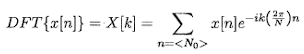

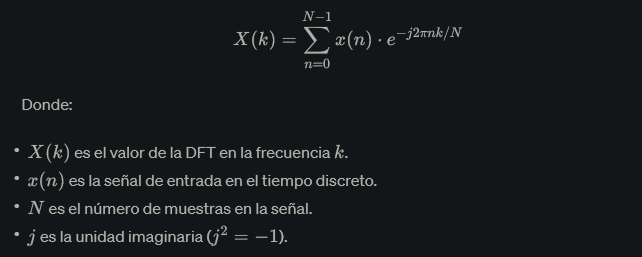

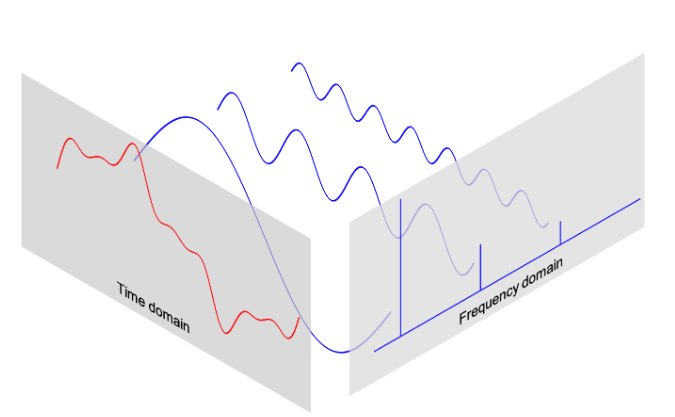

Notar como se puede optimizar computacionalmente la Transformada de Fourier. Bibliografia: Lyons

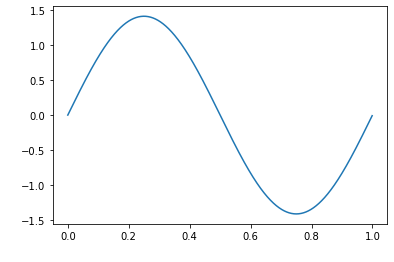

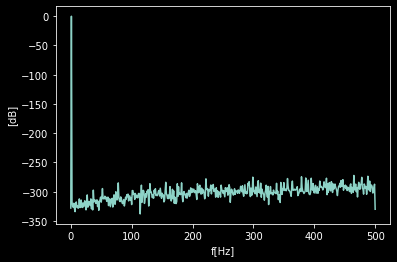

In [2]:
fs = 1000. #[Hz] Definido por ADC 
  # NOTA: usar escalares con X. para usar variables tipo enteras en procesador 
N = fs # muestras (Normalizamos para ver mejor el grafico)

A = np.sqrt(2)
tt, xx = mi_funcion_sen( vmax = A, dc = 0, ff = 1, ph=0, nn = N, fs = fs) 

X = (1/N)*fourier_transform_v1(xx)

df = fs/N 
ff = np.arange(start = 0, stop = len(xx) , step = df)
bfrec = ff <= fs/2

iplot( tt, xx,"t[seg]","V[Voltage]")
iplot( ff[bfrec], 10* np.log10(2*np.abs(X[bfrec])**2),"f[Hz]","[dB]")

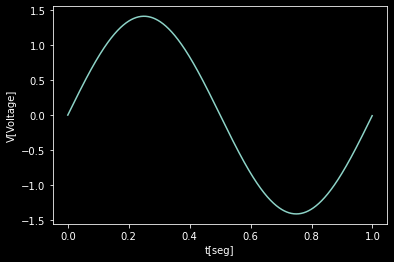

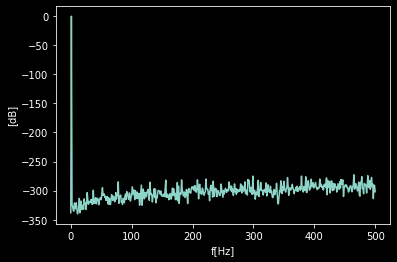

In [3]:
fs = 1000. #[Hz] Definido por ADC 
  # NOTA: usar escalares con X. para usar variables tipo enteras en procesador 
N = fs # muestras (Normalizamos para ver mejor el grafico)

A = np.sqrt(2)
tt, xx = mi_funcion_sen( vmax = A, dc = 0, ff = 1, ph=0, nn = N, fs = fs) 

X = (1/N)*DFT(xx)

df = fs/N 
ff = np.arange(start = 0, stop = len(xx) , step = df)
bfrec = ff <= fs/2

iplot( tt, xx,"t[seg]","V[Voltage]")
iplot( ff[bfrec], 10* np.log10(2*np.abs(X[bfrec])**2),"f[Hz]","[dB]")

Tecnica separando en muestras pares e impares:

From: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

Twiddle Factors: es la identidad de Euler expresada en el dominio discreto

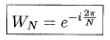

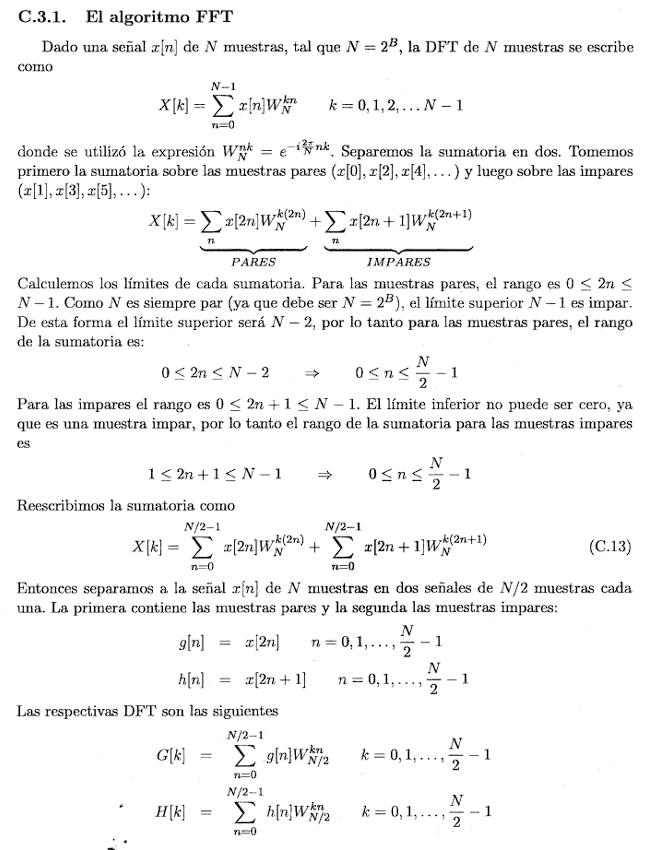

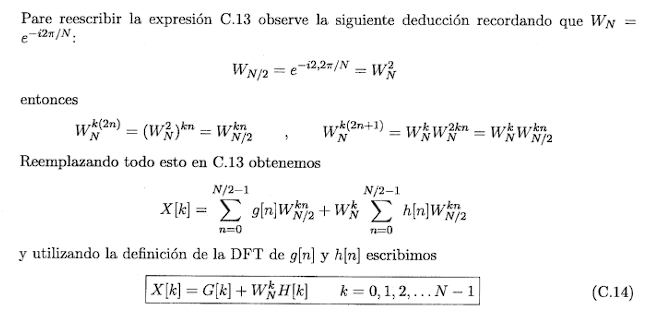

Al muestrear en un dominio (Tiempo), se vuelve periodico en el otro dominio (Frecuencia). Por esto, se recorta la FFT hasta fs/2 (Frecuencia Ing. Nyquist)

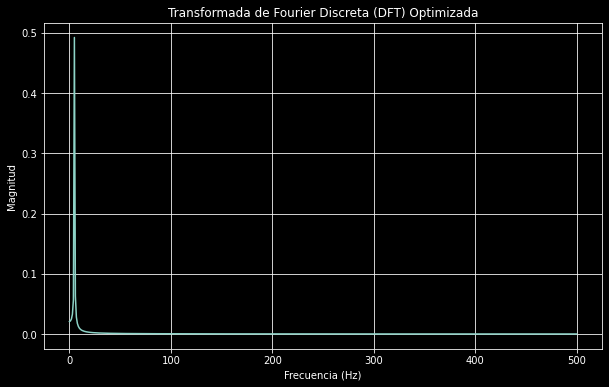

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform_optimized(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    
    if N == 1:
        return x  # Caso base: transformada de una sola muestra
    
    # Dividir la señal en muestras pares e impares
    x_even = x[::2]
    x_odd = x[1::2]
    
    # Calcular las transformadas de Fourier de las muestras pares e impares
    X_even = fourier_transform_optimized(x_even)
    X_odd = fourier_transform_optimized(x_odd)
    
    # Combinar las transformadas de Fourier de muestras pares e impares
    for k in range(N // 2):
        t = np.exp(-2j * np.pi * k / N) * X_odd[k]
        X[k] = X_even[k] + t
        X[k + N // 2] = X_even[k] - t
    
    return X

# Parámetros de la señal
vmax = 1.0       # Valor máximo de la señal
dc = 0.0         # Componente de continua
ff = 5.0         # Frecuencia de la señal en Hz
ph = np.pi / 4   # Fase de la señal en radianes
nn = 1024        # Número de puntos de la señal generada
fs = 1000.0      # Frecuencia de muestreo en Hz

# Generar la señal senoidal
tiempo, senoidal = mi_funcion_sen(vmax, dc, ff, ph, nn, fs)

# Calcular la DFT optimizada
dft = (1/N) * fourier_transform_optimized(senoidal)

# Calcular las frecuencias correspondientes
N = len(dft)
df = fs / N
frecuencias = np.arange(0, N) * df
bfrec = frecuencias <= fs / 2

# Plot de la DFT
plt.figure(figsize=(10, 6))
plt.plot(frecuencias[bfrec], np.abs(dft[bfrec]))
plt.title('Transformada de Fourier Discreta (DFT) Optimizada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()

plt.show()
